Precisión: 0.6529
Recall por clase:
Clase 0: 0.7090
Clase 1: 0.5651
Clase 2: 0.6855


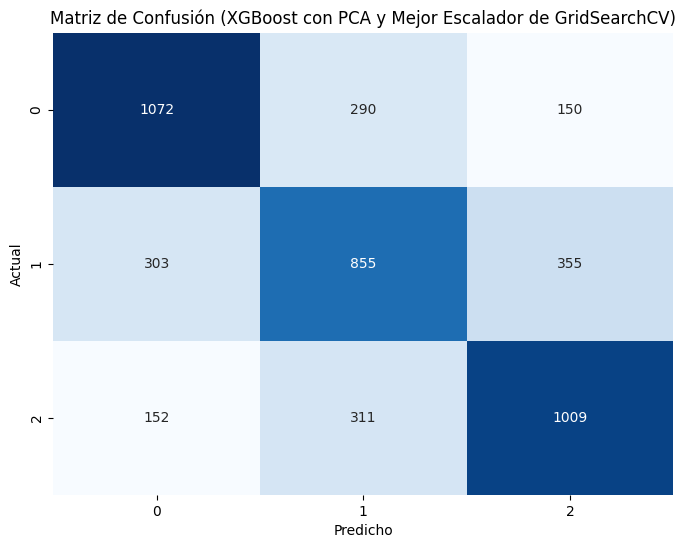

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Cargar los datos
X = pd.read_csv('X.csv')
y_cat = pd.read_csv('y_cat.csv')

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

# Cargar el modelo
with open('best_xgb_model2.pkl', 'rb') as file:
    best_xgb = pickle.load(file)

# Realizar predicciones
y_pred = best_xgb.predict(X_test)

# Calcular la precisión y el recall para cada clase
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average=None)
cm = confusion_matrix(y_test, y_pred)

print(f'Precisión: {accuracy:.4f}')
print(f'Recall por clase:')
for i in range(len(recall)):
    print(f'Clase {i}: {recall[i]:.4f}')

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicho')
plt.ylabel('Actual')
plt.title(f'Matriz de Confusión (XGBoost con PCA y Mejor Escalador de GridSearchCV)')
plt.show()
